# 多元逻辑回归

<img src="https://i.loli.net/2021/03/19/JnwYZFNhkmdyx9o.png" alt="image-20210319131902103" style="zoom:50%;" />

### 1. 加载数据

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
TRAIN_URL = 'http://download.tensorflow.org/data/iris_training.csv'
train_path = tf.keras.utils.get_file(TRAIN_URL.split('/')[-1],TRAIN_URL)

8192/2194 [================================================================================================================] - 0s 0us/step


In [3]:
df_iris = pd.read_csv(train_path,header=0)

### 2. Data preprocessing

1. 转化为NumPy数组 
2. 提取属性和标签 
3. 提取山产尾和变色弘尾
4. 可视化样本
5. 属性中心化
6. 生成多元模型的属性矩阵和标签列向量

In [5]:
# 转化为NumPy数组
iris = np.array(df_iris)
iris.shape

(120, 5)

In [6]:
# 提取属性和标签
train_x = iris[:,0:2]
train_y = iris[:,4]

train_x.shape, train_y.shape

((120, 2), (120,))

In [8]:
# 提取山产尾和变色弘尾
x_train = train_x[train_y<2]
y_train = train_y[train_y<2]

x_train.shape, y_train.shape

((78, 2), (78,))

In [10]:
num = len(x_train)
num

78

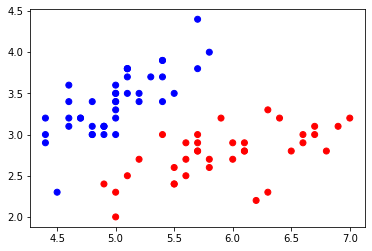

In [13]:
# 数据可视化
cm_pt = mpl.colors.ListedColormap(['blue','red'])
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt) # 横坐标: 花萼长度， 纵坐标：花萼宽度； y=0:blue, y=1: red
plt.show()

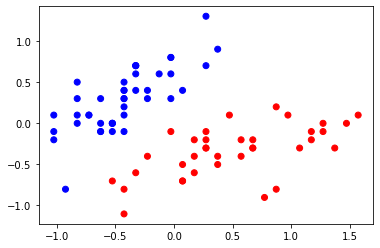

In [14]:
# 属性中心化
x_train = x_train - np.mean(x_train,axis = 0)
plt.scatter(x_train[:,0],x_train[:,1],c=y_train,cmap=cm_pt) # 横坐标: 花萼长度， 纵坐标：花萼宽度； y=0:blue, y=1: red
plt.show()

In [15]:
# 生成多元模型的属性矩阵和标签列向量
x0_train = np.ones(num).reshape(-1,1)

X = tf.cast(tf.concat((x0_train,x_train),axis=1) ,tf.float32)
Y = tf.cast(y_train.reshape(-1,1),tf.float32)

X.shape, Y.shape

(TensorShape([78, 3]), TensorShape([78, 1]))

### 3. 设置超参数

In [17]:
learn_rate = 0.2
iter = 120

display_step = 30

### 4. Model initialization

In [18]:
np.random.seed(612)
W = tf.Variable(np.random.randn(3,1),dtype=tf.float32)

### 5. train model

In [19]:
ce = [] # cross entropy
acc = []

for i in range(iter+1):
    with tf.GradientTape() as tape:
        PRED = 1/(1+tf.exp(-tf.matmul(X,W)))
        Loss = -tf.reduce_mean(Y*tf.math.log(PRED)+(1-Y)*tf.math.log(1-PRED))
        
    accuracy = tf.reduce_mean(tf.cast(tf.equal(Y,tf.where(PRED.numpy()<0.5,0.,1.)),tf.float32))
    ce.append(Loss)
    acc.append(accuracy)
    
    dl_dw = tape.gradient(Loss,W)
    W.assign_sub(learn_rate * dl_dw)
    
    if i%display_step ==0:
        print(f'i: {i}, Loss: {Loss}, Accuracy: {accuracy}')


i: 0, Loss: 0.9942691326141357, Accuracy: 0.23076923191547394
i: 30, Loss: 0.4818924069404602, Accuracy: 0.9615384340286255
i: 60, Loss: 0.31912824511528015, Accuracy: 0.9871794581413269
i: 90, Loss: 0.24662578105926514, Accuracy: 0.9871794581413269
i: 120, Loss: 0.20498204231262207, Accuracy: 1.0
